In [1]:
# impoting libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### Data Loading

In [2]:
gender_df = pd.read_csv('E:/College related/Projects/Titanic/gender_submission.csv')
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [4]:
test_df = pd.read_csv('E:/College related/Projects/Titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_df['Survived'] = gender_df['Survived'].values
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [7]:
test_df.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Flegenheim, Mrs. Alfred (Antoinette)",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [8]:
train_df = pd.read_csv('E:/College related/Projects/Titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cunningham, Mr. Alfred Fleming",male,347082,G6,S
freq,1,577,7,4,644


### Data Cleaning

In [12]:
gender_df.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [13]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [14]:
#it looks like that the cabin column is almost full of null values, so i decided to drop it
test_df.drop('Cabin', axis = 1,  inplace = True)

In [15]:
test_df.Age = test_df.Age.fillna(np.mean(test_df['Age']))

In [16]:
test_df.Fare = test_df.Fare.fillna(np.mean(test_df['Fare']))

In [17]:
test_df.duplicated().sum()

0

In [18]:
#it looks like that the cabin column is almost full of null values, so i decided to drop it
train_df.drop('Cabin', axis = 1,  inplace = True)

In [19]:
train_df.Age = train_df.Age.fillna(np.mean(train_df['Age']))

In [20]:
train_df.Fare = train_df.Fare.fillna(np.mean(train_df['Fare']))

In [21]:
train_df.dropna(inplace = True)

### Exploration of Data Using Charts

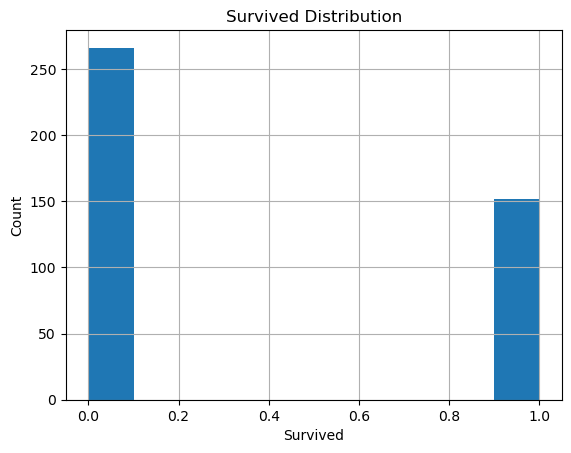

In [24]:
gender_df.Survived.hist();
plt.show();
plt.xlabel('Survived');
plt.ylabel('Count');
plt.title('Survived Distribution');

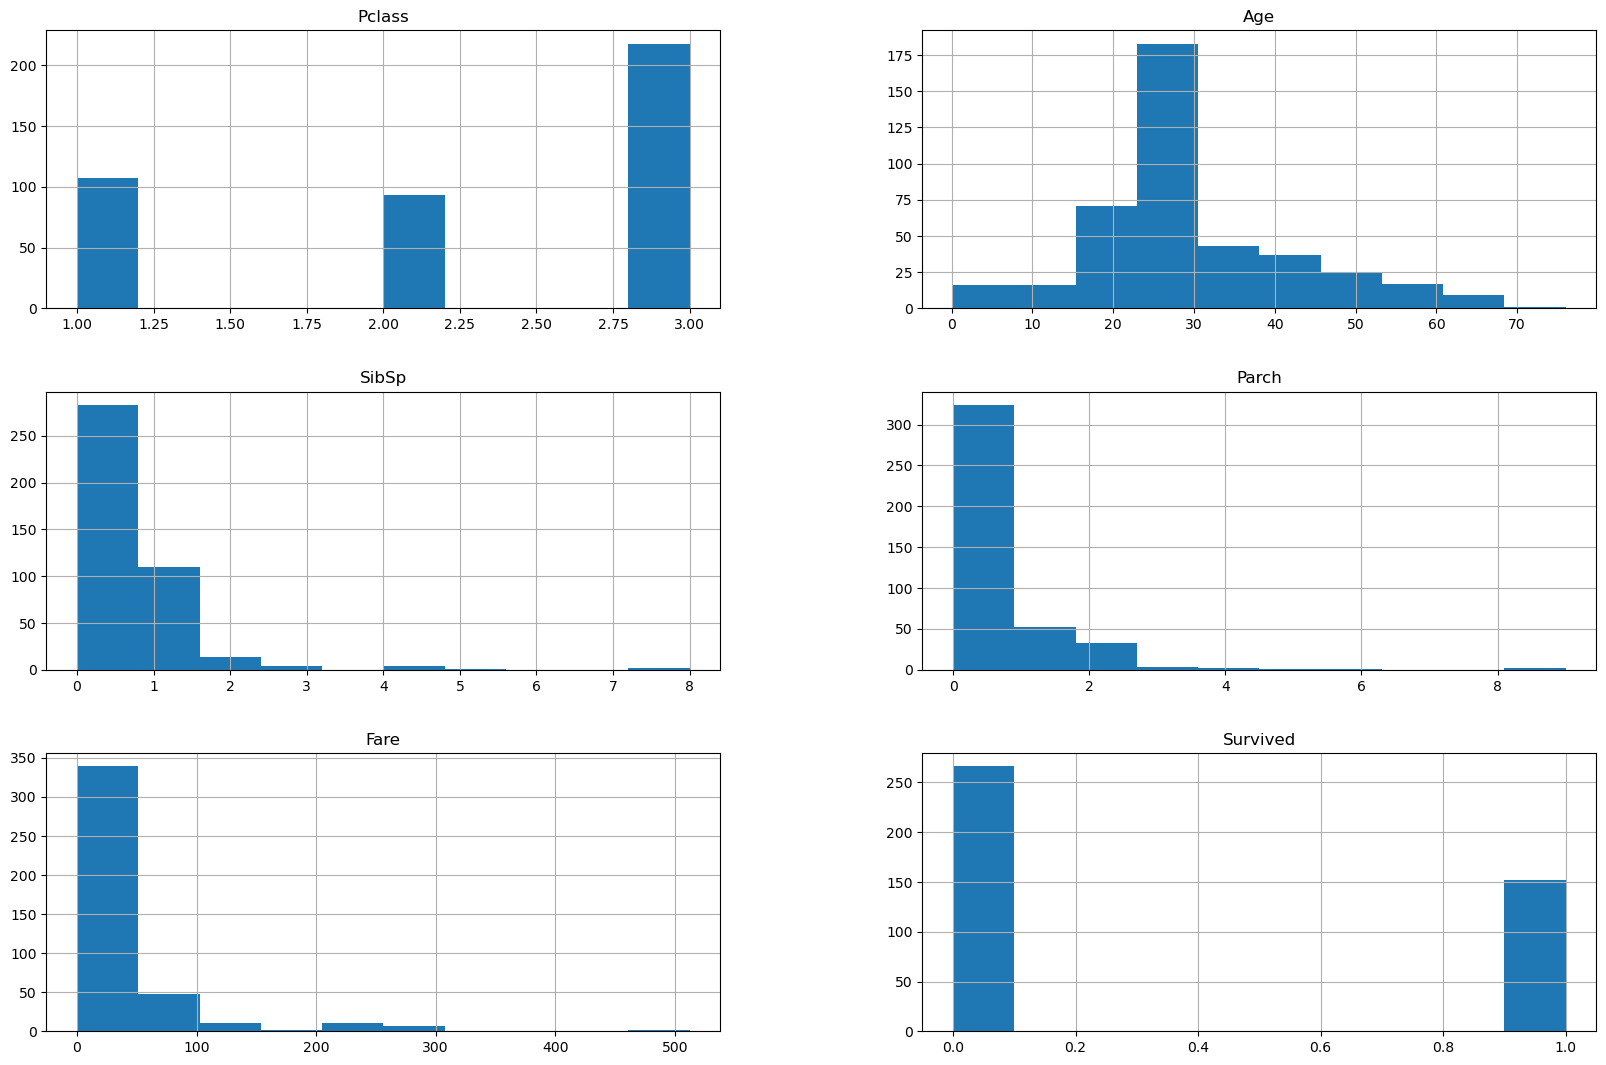

In [26]:
plt.rcParams["figure.figsize"] = (20,13) 
test_df.iloc[:, 1:].hist()
plt.show()

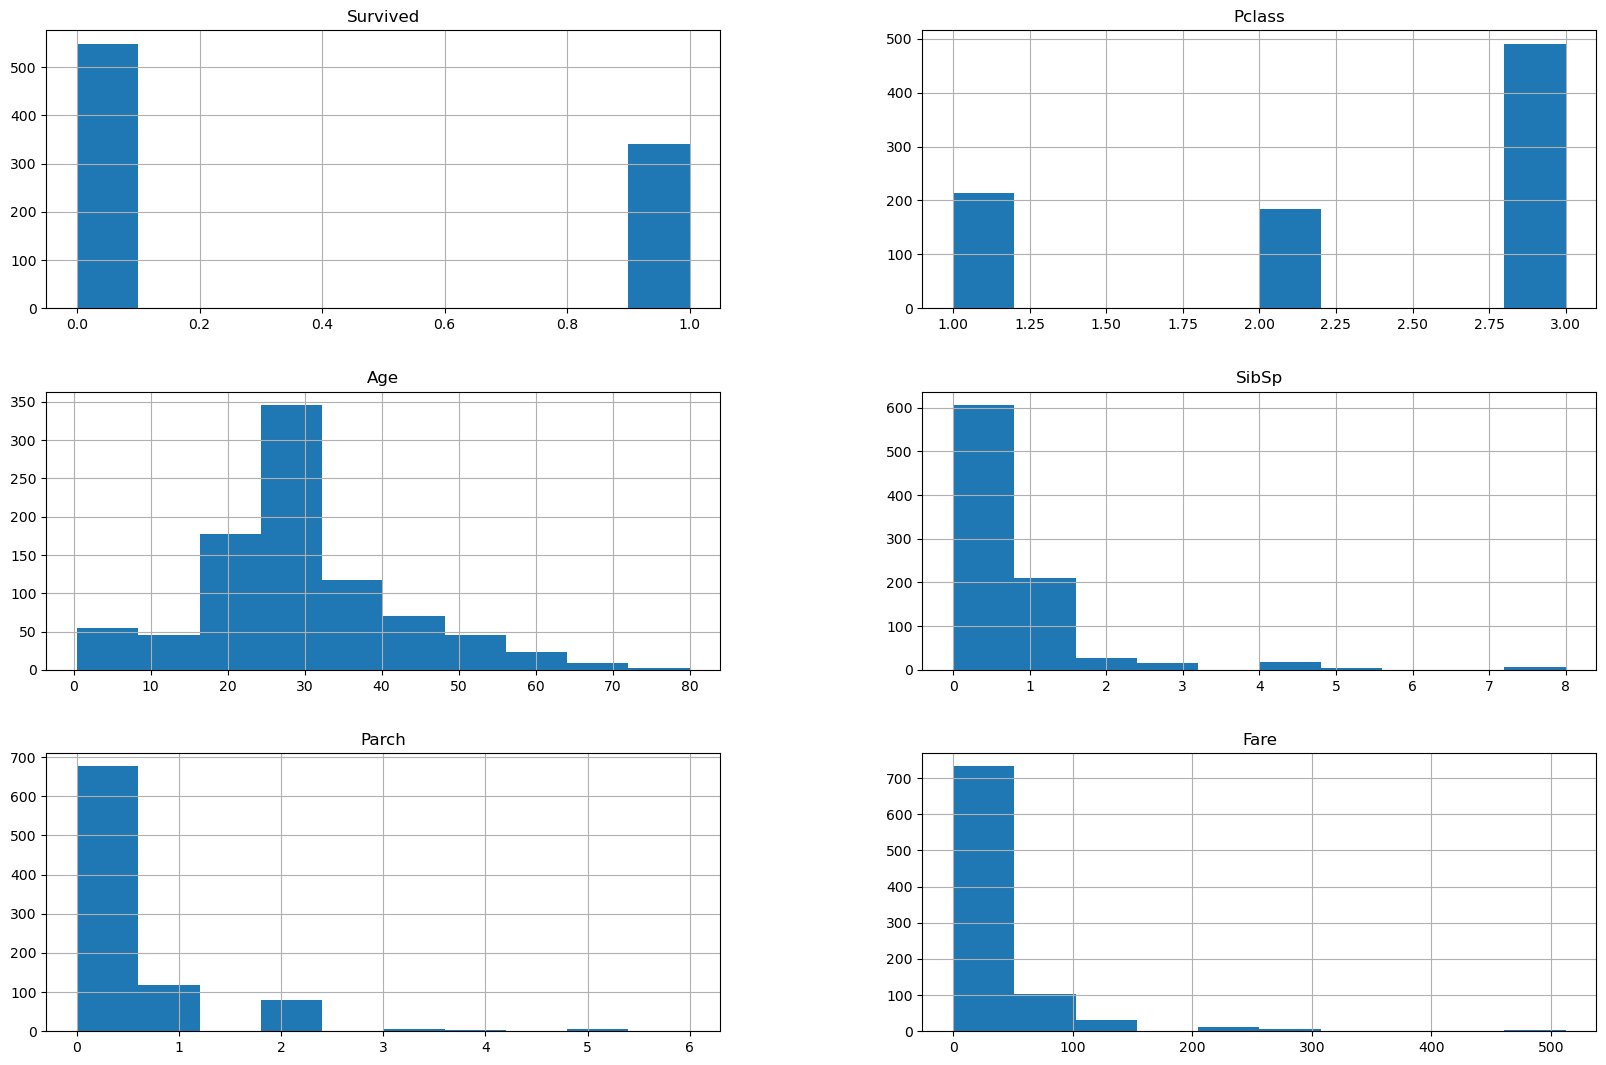

In [69]:
plt.rcParams["figure.figsize"] = (20,13) 
train_df.iloc[:, 1:].hist()
plt.show()

In [27]:
# From this we see that the test data and the train data have nearly the same data distribution and 
#we can move on with our analysis

In [42]:
survived = train_df[train_df['Survived'] == True]
survived_not = train_df[train_df['Survived'] == False]

In [30]:
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


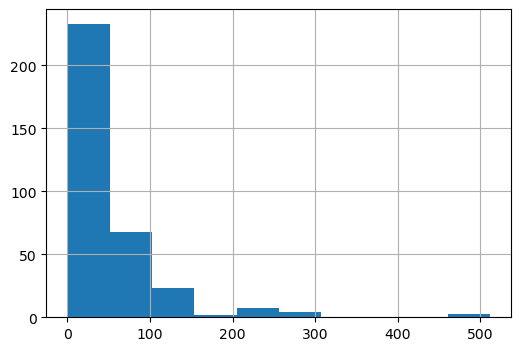

In [40]:
# is there a relation with the survived population and the fare amount paid
plt.rcParams["figure.figsize"] = (6,4)
survived.Fare.hist()
plt.show()

In [41]:
survived.Fare.describe()

count    340.000000
mean      48.209498
std       66.748773
min        0.000000
25%       12.443750
50%       26.000000
75%       56.946900
max      512.329200
Name: Fare, dtype: float64

In [43]:
survived_not.Fare.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [44]:
#From the previous conclusions it seems like that the fare had an effect on the survival rate of the passenger as the mean 
# is higher and also the median is high in the survived data

In [45]:
survived.Sex.value_counts()

female    231
male      109
Name: Sex, dtype: int64

In [46]:
survived_not.Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [47]:
# the major part of non survivals are males.

### Deep Learning

In [60]:
categorical_data_train = train_df[['Sex', 'Embarked']]
numeric_data_train = train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [61]:
categorical_data_test = test_df[['Sex', 'Embarked']]
numeric_data_test = test_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [62]:
categorical_data_train_encoded = pd.get_dummies(categorical_data_train, drop_first=True)
categorical_data_test_encoded = pd.get_dummies(categorical_data_test, drop_first=True)

In [63]:
categorical_data_train_encoded.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [64]:
categorical_data_test_encoded.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [65]:
df_new_train = pd.concat([numeric_data_train, categorical_data_train_encoded], axis=1)
df_new_test = pd.concat([numeric_data_test, categorical_data_test_encoded], axis=1)

In [72]:
X_train = df_new_train[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y_train = df_new_train['Survived']

In [73]:
X_test = df_new_test[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y_test = df_new_test['Survived']

In [76]:
frames_train = [X_train, X_test]
result_train = pd.concat(frames_train)

In [77]:
frames_test = [y_train, y_test]
result_test = pd.concat(frames_test)

In [78]:
result_train

,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.00000,1,0,7.2500,0,1
1,1,0,38.00000,1,0,71.2833,0,0
2,3,0,26.00000,0,0,7.9250,0,1
3,1,0,35.00000,1,0,53.1000,0,1
4,3,1,35.00000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,1
414,1,0,39.00000,0,0,108.9000,0,0
415,3,1,38.50000,0,0,7.2500,0,1
416,3,1,30.27259,0,0,8.0500,0,1


In [80]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(result_train, result_test, test_size = 0.2, random_state = 0)

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 8))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Adding the forth.1 hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Adding the forth.2 hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Adding the fifth hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Adding the fifth hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [101]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Train on 1045 samples
Epoch 1/1000
1045/1045 [==============================] - 1s 768us/sample - loss: 0.5760 - accuracy: 0.7388
Epoch 2/1000
1045/1045 [==============================] - 0s 124us/sample - loss: 0.4214 - accuracy: 0.8488
Epoch 3/1000
1045/1045 [==============================] - 0s 131us/sample - loss: 0.3860 - accuracy: 0.8555
Epoch 4/1000
1045/1045 [==============================] - 0s 123us/sample - loss: 0.3734 - accuracy: 0.8622
Epoch 5/1000
1045/1045 [==============================] - 0s 124us/sample - loss: 0.3592 - accuracy: 0.8641
Epoch 6/1000
1045/1045 [==============================] - 0s 127us/sample - loss: 0.3532 - accuracy: 0.8651
Epoch 7/1000
1045/1045 [==============================] - 0s 126us/sample - loss: 0.3727 - accuracy: 0.8517
Epoch 8/1000
1045/1045 [==============================] - 0s 126us/sample - loss: 0.3611 - accuracy: 0.8603
Epoch 9/1000
1045/1045 [==============================] - 0s 126us/sample - loss: 0.3411 - accuracy: 0.8689
Epoch 

In [102]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[135  22]
 [ 26  79]]


0.816793893129771